In [1]:
import pandas as pd
import numpy as np 


In [2]:
df=pd.read_csv(r'D:\Machine Learning Full\Linear Regression\1000_Companies.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
x=df.iloc[:,:-1].values
print(type(x),x.shape)
x

<class 'numpy.ndarray'> (1000, 4)


array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [5]:
y=df.iloc[:,-1].values
print(type(y))
print(y.shape)
y[:5]


<class 'numpy.ndarray'>
(1000,)


array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
print(x.shape)
x[:5]

(1000, 4)


array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [8]:
val=x[:,3]
print(np.unique(val))
val.shape
val.reshape(-1,1)
val.shape

[0 1 2]


(1000,)

In [9]:
value=pd.get_dummies(val)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [10]:
print(type(value),type(x))
value=np.array(value)
value.shape

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


(1000, 3)

In [11]:
print(x[:4])
print('--')
print(value[:4])

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]]
--
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


In [12]:
x=np.delete(x,3,1)
print(x.shape,y.shape)
print(x[:3])
print('---',[:3])

SyntaxError: invalid syntax (850005087.py, line 4)

In [13]:
X=np.column_stack((x,value))
X.shape

(1000, 7)

In [14]:
X

array([[165349.2, 136897.8, 471784.1, ..., 0, 0, 1],
       [162597.7, 151377.59, 443898.53, ..., 1, 0, 0],
       [153441.51, 101145.55, 407934.54, ..., 0, 1, 0],
       ...,
       [100275.47, 241926.31, 227142.82, ..., 1, 0, 0],
       [128456.23, 321652.14, 281692.32, ..., 1, 0, 0],
       [161181.72, 270939.86, 295442.17, ..., 0, 0, 1]], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=regressor.predict(X_test)
y_pred[:4]

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ])

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01 -2.32723024e+02
  2.93512199e+02 -3.54301375e+02  6.07891752e+01]
-51328.74192347913


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268795

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted')

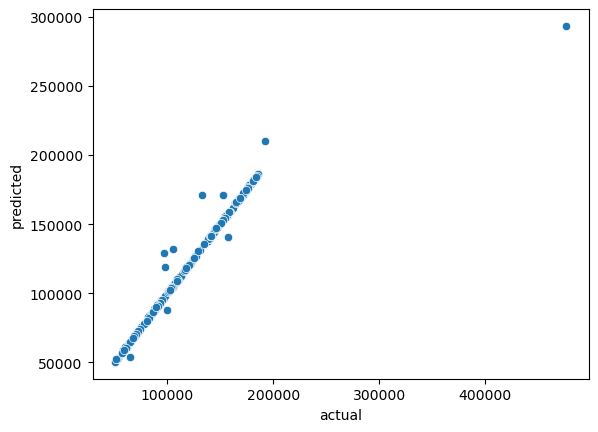

In [24]:
# PLOTING IT 
import seaborn as sns 
sns.scatterplot(y_test,y_pred)
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.xlabel('actual')
plt.ylabel('predicted')

from this we can make good observations that there are not many outliers and thus predicted and actual values are almost same 
